In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

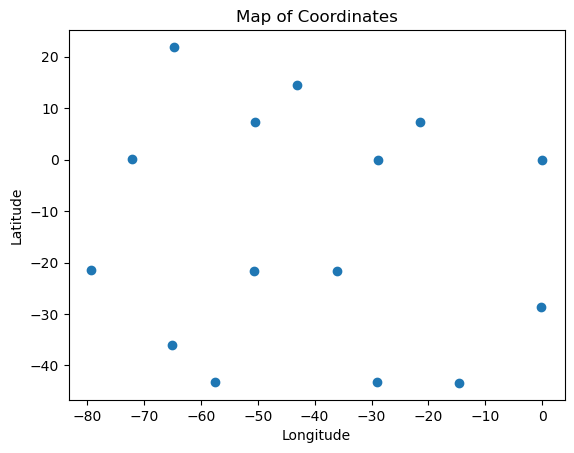

In [2]:
# Coordinates from the file
coordinates = [
    [0.549963E-07, 0.985808E-08],
    [-28.8733, -0.797739E-07],
    [-79.2916, -21.4033],
    [-14.6577, -43.3896],
    [-64.7473, 21.8982],
    [-29.0585, -43.2167],
    [-72.0785, 0.181581],
    [-36.0366, -21.6135],
    [-50.4808, 7.37447],
    [-50.5859, -21.5882],
    [-0.135819, -28.7293],
    [-65.0866, -36.0625],
    [-21.4983, 7.31942],
    [-57.5687, -43.2506],
    [-43.0700, 14.5548]
]

# Extract x and y coordinates
x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

# Plot the coordinates
plt.scatter(x, y)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Coordinates')
plt.show()

In [9]:
# read in the distance matrix
distances = np.loadtxt('people.sc.fsu.edu_~jburkardt_datasets_cities_lau15_dist.txt')
print(distances)

[[ 0. 29. 82. 46. 68. 52. 72. 42. 51. 55. 29. 74. 23. 72. 46.]
 [29.  0. 55. 46. 42. 43. 43. 23. 23. 31. 41. 51. 11. 52. 21.]
 [82. 55.  0. 68. 46. 55. 23. 43. 41. 29. 79. 21. 64. 31. 51.]
 [46. 46. 68.  0. 82. 15. 72. 31. 62. 42. 21. 51. 51. 43. 64.]
 [68. 42. 46. 82.  0. 74. 23. 52. 21. 46. 82. 58. 46. 65. 23.]
 [52. 43. 55. 15. 74.  0. 61. 23. 55. 31. 33. 37. 51. 29. 59.]
 [72. 43. 23. 72. 23. 61.  0. 42. 23. 31. 77. 37. 51. 46. 33.]
 [42. 23. 43. 31. 52. 23. 42.  0. 33. 15. 37. 33. 33. 31. 37.]
 [51. 23. 41. 62. 21. 55. 23. 33.  0. 29. 62. 46. 29. 51. 11.]
 [55. 31. 29. 42. 46. 31. 31. 15. 29.  0. 51. 21. 41. 23. 37.]
 [29. 41. 79. 21. 82. 33. 77. 37. 62. 51.  0. 65. 42. 59. 61.]
 [74. 51. 21. 51. 58. 37. 37. 33. 46. 21. 65.  0. 61. 11. 55.]
 [23. 11. 64. 51. 46. 51. 51. 33. 29. 41. 42. 61.  0. 62. 23.]
 [72. 52. 31. 43. 65. 29. 46. 31. 51. 23. 59. 11. 62.  0. 59.]
 [46. 21. 51. 64. 23. 59. 33. 37. 11. 37. 61. 55. 23. 59.  0.]]


In [8]:
# Function to calculate the total distance of a tour
def calculate_distance(tour, distances):
    total_distance = 0
    num_cities = len(tour)
    for i in range(num_cities):
        j = (i + 1) % num_cities  # Next city in the tour
        city_i = tour[i]
        city_j = tour[j]
        total_distance += distances[city_i][city_j]
    return total_distance

In [10]:
# Simulated Annealing algorithm
def simulated_annealing(distances, initial_temperature, cooling_rate, num_iterations):
    num_cities = len(distances)
    current_solution = random.sample(range(num_cities), num_cities)  # Random initial tour
    best_solution = current_solution[:]  # Initialize the best solution with the current solution
    current_distance = calculate_distance(current_solution, distances)
    best_distance = current_distance

    temperature = initial_temperature

    for iteration in range(num_iterations):
        # Generate a candidate solution by swapping two cities
        candidate_solution = current_solution[:]
        index_a = random.randint(0, num_cities - 1)
        index_b = random.randint(0, num_cities - 1)
        candidate_solution[index_a], candidate_solution[index_b] = candidate_solution[index_b], candidate_solution[index_a]

        # Calculate the distance of the candidate solution
        candidate_distance = calculate_distance(candidate_solution, distances)

        # Calculate the difference in distance (delta)
        delta = candidate_distance - current_distance

        # Determine whether to accept the candidate solution
        if delta <= 0:
            current_solution = candidate_solution
            current_distance = candidate_distance
        else:
            acceptance_probability = math.exp(-delta / temperature)
            if random.random() < acceptance_probability:
                current_solution = candidate_solution
                current_distance = candidate_distance

        # Update the best solution if necessary
        if current_distance < best_distance:
            best_solution = current_solution[:]
            best_distance = current_distance

        # Cool down the temperature
        temperature *= cooling_rate

    return best_solution, best_distance

In [11]:
# Run the algorithm
initial_temperature = 1000
cooling_rate = 0.95
num_iterations = 10000

best_solution, best_distance = simulated_annealing(distances, initial_temperature, cooling_rate, num_iterations)

print("Best solution:", best_solution)
print("Best distance:", best_distance)

Best solution: [3, 10, 0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5]
Best distance: 291.0


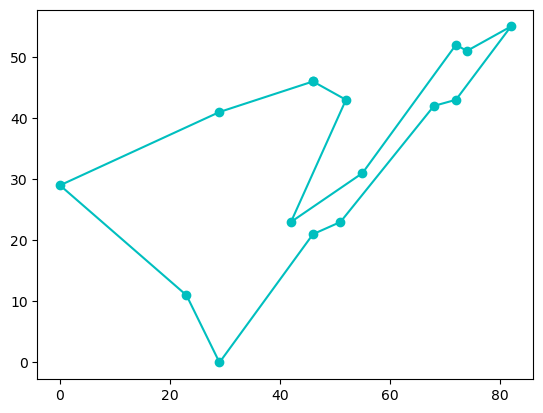

In [12]:
# Visualize the results at the first and the last iteration.

def plot_tour(tour, distances):
    num_cities = len(tour)
    x = np.zeros(num_cities + 1)
    y = np.zeros(num_cities + 1)
    for i in range(num_cities):
        x[i] = distances[tour[i]][0]
        y[i] = distances[tour[i]][1]
    x[num_cities] = distances[tour[0]][0]
    y[num_cities] = distances[tour[0]][1]
    plt.plot(x, y, 'co-')
    plt.show()

plot_tour(best_solution, distances)